In [53]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import re
from pathlib import Path
import math

## 1

- Read in the data in the covid.csv file
- Create a date column by parsing the dateRep column into a datetime
- Set the date column as the index
- Use the replace() method to update all occurrences of United_States_of_America and United Kingdom to USA and UK, respectively
- Sort the index

In [3]:
cwd = Path.cwd()
cwd

datapath = cwd / Path('data')
datapath

path = datapath.joinpath(Path('covid.csv'))
path

path = Path('data').joinpath(Path('covid.csv'))
covid = pd.read_csv(path, low_memory=False)

In [42]:
# Convert the 'dateRep' column to datetime format and assign it to a new column 'date'
covid['date'] = pd.to_datetime(covid['dateRep'], dayfirst=True)

# Set the 'date' column as the index for the dataframe
covid.set_index('date', inplace=True)

# Replace occurrences of country names 'United_States_of_America' and 'United_Kingdom' with 'USA' and 'UK' respectively in the 'countriesAndTerritories' column
covid['countriesAndTerritories'].replace({'United_States_of_America': 'USA', 'United_Kingdom': 'UK'}, inplace=True)

# Sort the dataframe by the index (date)
covid.sort_index(inplace=True)

# Display the first 3 rows for the countries 'USA' and 'UK'
covid[covid['countriesAndTerritories'].isin(['USA', 'UK'])].head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2019-12-31,2019-12-31,31,12,2019,0,0,UK,UK,GBR,66647112.00,Europe,NaN
2019-12-31,2019-12-31,31,12,2019,0,0,USA,US,USA,329064917.00,America,NaN
2020-01-01,2020-01-01,1,1,2020,0,0,USA,US,USA,329064917.00,America,NaN


## 2
With the `earthquake.csv` file, select all earthquakes in Japan with a magnitude of 4 or greater. Display them sorted by time. Only output the magnitude and the place.

In [6]:
cwd = Path.cwd()
cwd

datapath = cwd / Path('data')
datapath

path = datapath.joinpath(Path('earthquake.csv'))
path

path = Path('data').joinpath(Path('earthquake.csv'))
eathquake = pd.read_csv(path, low_memory=False)

In [43]:
# Apply a filter to select earthquakes occurring in Japan with a magnitude of 4.0 or higher
filter_condition = (earthquake['parsed_place'] == 'Japan') & (earthquake['mag'] >= 4)

# Sort the filtered earthquakes by the 'time' column
sorted_earthquakes = earthquake[filter_condition].sort_values(by='time')

# Display the first 5 rows of the sorted earthquakes, including only the 'mag' (magnitude) and 'parsed_place' columns
top_earthquakes = sorted_earthquakes[['mag', 'parsed_place']].head(5)
top_earthquakes

,mag,parsed_place
9198,4.60,Japan
9083,5.10,Japan
9070,4.70,Japan
8687,4.20,Japan
8555,4.60,Japan


## 3
Create bins for each full number of earthquake magnitude (magType = 'ml') and count how many are in each bin. Output them in magnitude order.

In [47]:
# Select records from the 'earthquake' dataframe where 'magType' is 'ml'
filtered_earthquakes = earthquake[earthquake['magType'] == 'ml']

# Determine the range for magnitude bins starting from the minimum to the maximum magnitude, rounded to the nearest whole number
magnitude_bins = list(range(int(filtered_earthquakes['mag'].min()) - 1, int(filtered_earthquakes['mag'].max()) + 2))

# Group the earthquakes into the defined bins and count the occurrences in each bin, sorting the results by magnitude
magnitude_counts = pd.DataFrame(pd.cut(filtered_earthquakes['mag'], bins=magnitude_bins, include_lowest=True, right=False).value_counts().sort_index())
magnitude_counts

,count
mag,
"[-2, -1)",13
"[-1, 0)",446
"[0, 1)",2072
"[1, 2)",3126
"[2, 3)",985
"[3, 4)",153
"[4, 5)",6
"[5, 6)",2


## 4
Using the `faang.csv`: Group by ticker and resample to monthly.

Make the following aggregations:
- Mean opening price
- Max high price
- Min low price
- Mean closing price
- Sum of volume traded

Floating point numbers should have two decimals.

In [10]:
cwd = Path.cwd()
cwd

datapath = cwd / Path('data')
datapath

path = datapath.joinpath(Path('faang.csv'))
path

path = Path('data').joinpath(Path('faang.csv'))
faang = pd.read_csv(path, low_memory=False)

In [11]:
# Group by ticker and resample to monthly
faang['date'] = pd.to_datetime(faang['date']) 
faang_grouped = faang.groupby(by='ticker').resample('M', on='date')

# Floating point numbers should have two decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

aggregations = {
    'open': 'mean',
    'high': 'max',
    'low': 'min',
    'close': 'mean',
    'volume': 'sum'
}
values = faang_grouped.agg(aggregations).round(2)
values

open    high     low   close        volume
ticker date                                                    
AAPL   2018-01-31   43.51   45.03   41.17   43.50 2638717600.00
       2018-02-28   41.82   45.15   37.56   41.91 3711577200.00
       2018-03-31   43.76   45.88   41.24   43.62 2854910800.00
       2018-04-30   42.44   44.74   40.16   42.46 2664617200.00
       2018-05-31   46.24   47.59   41.32   46.38 2483905200.00
       2018-06-30   47.18   48.55   45.18   47.16 2110498000.00
       2018-07-31   47.55   48.99   45.85   47.58 1574765600.00
       2018-08-31   53.12   57.22   49.33   53.34 2801275600.00
       2018-09-30   55.58   57.42   53.83   55.52 2715888000.00
       2018-10-31   55.30   58.37   51.52   55.21 3158994000.00
       2018-11-30   47.95   55.59   42.56   47.81 3845305600.00
       2018-12-31   41.31   46.24   36.65   41.07 3595690000.00
AMZN   2018-01-31 1301.38 1472.58 1170.51 1309.01   96371200.00
       2018-02-28 1447.11 1528.70 1265.93 1442.36  137784000.00
       2018-03-31 1542.16 1617.54 1365.20 1540.37  130400100.00
       2018-04-30 1475.84 1638.10 1352.88 1468.22  129919600.00
       2018-05-31 1590.47 1635.00 1546.02 1594.90   71615500.00
       2018-06-30 1699.09 1763.10 1635.09 1698.82   85941300.00
       2018-07-31 1786.31 1880.05 1678.06 1784.65   97521100.00
       2018-08-31 1891.96 2025.57 1776.02 1897.85   96575800.00
       2018-09-30 1969.24 2050.50 1865.00 1966.08   94445500.00
       2018-10-31 1799.63 2033.19 1476.36 1782.06  183220800.00
       2018-11-30 1622.32 1784.00 1420.00 1625.48  139290000.00
       2018-12-31 1572.92 1778.34 1307.00 1559.44  154812700.00
FB     2018-01-31  184.58  190.66  175.80  184.96  495655700.00
       2018-02-28  180.72  195.32  167.18  180.27  516251600.00
       2018-03-31  173.45  186.10  149.02  173.49  996201700.00
       2018-04-30  164.16  177.10  150.51  163.81  750072700.00
       2018-05-31  181.91  192.72  170.23  182.93  401144100.00
       2018-06-30  194.97  203.55  186.43  195.27  387265600.00
       2018-07-31  199.33  218.62  166.56  199.97  647030700.00
       2018-08-31  177.60  188.30  170.27  177.49  548832700.00
       2018-09-30  164.23  173.89  158.87  164.38  500468800.00
       2018-10-31  154.87  165.88  139.03  154.19  622446300.00
       2018-11-30  141.76  154.13  126.85  141.64  518151700.00
       2018-12-31  137.53  147.19  123.02  137.16  558786200.00
GOOG   2018-01-31 1127.20 1186.89 1045.23 1130.77   28738400.00
       2018-02-28 1088.63 1174.00  992.56 1088.21   42382000.00
       2018-03-31 1096.11 1177.05  980.64 1091.49   45353300.00
       2018-04-30 1038.42 1094.17  990.37 1035.70   41715900.00
       2018-05-31 1064.02 1110.75 1006.29 1069.28   31849400.00
       2018-06-30 1136.40 1186.29 1096.01 1137.63   32096000.00
       2018-07-31 1183.46 1273.89 1093.80 1187.59   31940100.00
       2018-08-31 1226.16 1256.50 1188.24 1225.67   28808400.00
       2018-09-30 1176.88 1212.99 1146.91 1175.81   28862400.00
       2018-10-31 1116.08 1209.96  995.83 1110.94   48494700.00
       2018-11-30 1054.97 1095.57  996.02 1056.16   36735100.00
       2018-12-31 1042.62 1124.65  970.11 1037.42   40257600.00
NFLX   2018-01-31  231.27  286.81  195.42  232.91  238377600.00
       2018-02-28  270.87  297.36  236.11  271.44  184585800.00
       2018-03-31  312.71  333.98  275.90  312.23  263449400.00
       2018-04-30  309.13  338.82  271.22  307.47  262006000.00
       2018-05-31  329.78  356.10  305.73  331.54  142050800.00
       2018-06-30  384.56  423.21  352.82  384.13  244031800.00
       2018-07-31  380.97  419.77  328.00  381.52  305393800.00
       2018-08-31  345.41  376.81  310.93  346.26  213122300.00
       2018-09-30  363.33  383.20  335.83  362.64  170832100.00
       2018-10-31  340.03  386.80  271.21  335.45  363589800.00
       2018-11-30  290.64  332.05  250.00  290.34  257126400.00
       2018-12-31  266.31  298.72  231.23  265.30  234310000.00

## 5

Calculate the z-scores for each numeric column of Amazon's data (faang.csv) but only for Q4 of 2018

In [54]:
# Filter data for Amazon's performance in the fourth quarter of 2018
faang['quarter'] = faang['date'].dt.quarter  # Extract quarter from the date
faang['year'] = faang['date'].dt.year  # Extract year from the date
values = faang[(faang['ticker'] == 'AMZN') & (faang['quarter'] == 4) & (faang['year'] == 2018)]  # Select data for Amazon in Q4 2018

# Clean up by removing temporary columns
faang.drop(['quarter', 'year'], axis=1, inplace=True)  # Remove 'quarter' and 'year' columns from the main dataframe
values.drop(['quarter', 'year'], axis=1, inplace=True)  # Remove 'quarter' and 'year' columns from the filtered dataframe

# Focus on numerical data
numeric_cols = values.select_dtypes(include=['float64', 'int64']).columns  # Identify columns with numerical data

# Standardize numerical values using z-score normalization
values[numeric_cols] = values[numeric_cols].apply(zscore)  # Apply z-score to numerical columns
values.head(5)  # Display the first 5 rows of the modified dataframe

,ticker,date,high,low,open,close,volume
690,AMZN,2018-10-01,2.39,2.52,2.36,2.41,-1.64
691,AMZN,2018-10-02,2.25,2.27,2.21,2.17,-0.87
692,AMZN,2018-10-03,2.08,2.16,2.09,2.04,-0.93
693,AMZN,2018-10-04,1.83,1.80,1.86,1.74,-0.13
694,AMZN,2018-10-05,1.64,1.57,1.66,1.60,-0.30


## 6
Represent all the values in the FAANG dataset in terms of the first date in the data. To do so, divide all values for each ticker by the values of the first date in the data for that ticker. When data is in this format, we can easily see growth over time.
Show only the first 5 days per ticker.

In [56]:
# Convert the 'date' column in the 'faang' DataFrame to datetime format for proper time series analysis.
faang['date'] = pd.to_datetime(faang['date'])

# Generate normalization factors by selecting the first entry for each ticker symbol in the 'faang' DataFrame.
# This will be used to normalize the financial metrics to the initial date for each stock.
normalization_factors = faang.groupby('ticker').transform('first')

# Normalize the financial metrics in the 'faang' DataFrame by dividing them by their respective values on the first date.
# This helps in comparing the performance relative to the starting point for each ticker.
cols = list(faang.columns)[2:]  # Select columns containing financial metrics, excluding 'date' and 'ticker'.
faang[cols] = faang[cols] / normalization_factors[cols]

# Select the first 5 entries for each ticker symbol in the 'faang' DataFrame to examine the initial data trends after normalization.
result = faang.groupby('ticker').head(5)
result

,ticker,date,high,low,open,close,volume
0,FB,2018-01-02,1.00,1.00,1.00,1.00,1.00
1,FB,2018-01-03,1.02,1.02,1.02,1.02,0.93
2,FB,2018-01-04,1.03,1.04,1.04,1.02,0.76
3,FB,2018-01-05,1.03,1.04,1.04,1.03,0.75
4,FB,2018-01-08,1.04,1.05,1.05,1.04,0.99
251,AAPL,2018-01-02,1.00,1.00,1.00,1.00,1.00
252,AAPL,2018-01-03,1.01,1.02,1.01,1.00,1.16
253,AAPL,2018-01-04,1.01,1.02,1.01,1.00,0.88
254,AAPL,2018-01-05,1.02,1.02,1.02,1.02,0.93
255,AAPL,2018-01-08,1.02,1.03,1.02,1.01,0.80


## 7
In the 
In the earthquake dataset you want to only leave data for the top 5 countries in terms of number of earthquakes for magType 'ml', 'md' and 'mb'.
Also show the number of earthquakes per country for the above.

In [58]:
# Filter the earthquake data for specific magnitude types: 'ml', 'md', and 'mb'.
values = earthquake[earthquake['magType'].isin(['ml', 'md', 'mb'])]

# Count the number of earthquakes per country using the 'parsed_place' column.
earthquakes_per_country = values['parsed_place'].value_counts()

# Identify the top 5 countries with the highest number of earthquakes.
top_5_countries = earthquakes_per_country.head(5).index

# Display the number of earthquakes for these top 5 countries.
print("Number of earthquakes in top 5 countries:")
print(earthquakes_per_country.loc[top_5_countries])

# Filter the dataset to include only data for the top 5 countries.
filtered_data = values[values['parsed_place'].isin(top_5_countries)]

# Display the first 5 rows of the filtered dataset for the top 5 countries.
print("\nFiltered data for the top 5 countries (first 5 rows):")
filtered_data.head(5)

Number of earthquakes in top 5 countries:
parsed_place
Alaska         3656
California     2856
Nevada          681
Hawaii          367
Puerto Rico     216
Name: count, dtype: int64

Filtered data for the top 5 countries (first 5 rows):


,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


## 8
Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

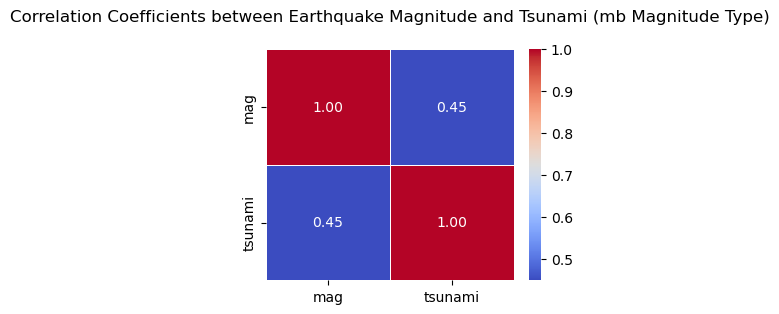

In [59]:
# Extracting data for earthquakes with 'mb' magnitude type, focusing on 'mag' and 'tsunami' columns.
values = earthquake.loc[(earthquake['magType'] == 'mb'), ['mag', 'tsunami']]

# Plotting a heatmap to visualize the correlation between earthquake magnitude and tsunami occurrence for 'mb' magnitude type earthquakes.
plt.figure(figsize=(4, 3))
heatmap = sns.heatmap(values.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
heatmap.set_title("Correlation Coefficients between Earthquake Magnitude and Tsunami (mb Magnitude Type)", pad=20)
plt.show()

## 9
For the 5 countries with the most covid cases (cumulative), find the day with the largest number of cases.

In [61]:
# Convert the 'dateRep' column in the 'covid' DataFrame to datetime format for proper time series analysis.
covid['dateRep'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')

# Aggregate the total number of COVID-19 cases for each country in the dataset.
covid_grouped = covid.groupby('countriesAndTerritories')['cases'].sum()

# Identify the top 5 countries with the highest total number of COVID-19 cases.
top_5_countries_by_cases = covid_grouped.nlargest(5)
print("Top 5 countries by COVID-19 cases:")
print(top_5_countries_by_cases)

# Filter the original 'covid' DataFrame to include only data from the top 5 countries with the most cases.
data_top_5_countries = covid[covid['countriesAndTerritories'].isin(top_5_countries_by_cases.index)]

# For each of the top 5 countries, find the day with the maximum number of reported COVID-19 cases.
max_cases_day_per_country = data_top_5_countries.loc[data_top_5_countries.groupby('countriesAndTerritories')['cases'].idxmax()]

# Sort the results by the number of cases in descending order to see the days with the highest number of cases at the top.
max_cases_day_per_country = max_cases_day_per_country.sort_values(by='cases', ascending=False)

# Display the days with the highest number of cases for each of the top 5 countries.
print("\nDay with the highest number of cases for each of the top 5 countries:")
max_cases_day_per_country

Top 5 countries by COVID-19 cases:
countriesAndTerritories
USA       6724667
India     5308014
Brazil    4495183
Russia    1091186
Peru       756412
Name: cases, dtype: int64

Day with the highest number of cases for each of the top 5 countries:


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-09-17,2020-09-17,17,9,2020,97894,1132,India,IN,IND,1366417756.00,Asia,92.57
2020-07-25,2020-07-25,25,7,2020,78427,1304,USA,US,USA,329064917.00,America,281.98
2020-07-30,2020-07-30,30,7,2020,74985,1457,USA,US,USA,329064917.00,America,281.92
2020-07-18,2020-07-18,18,7,2020,71494,908,USA,US,USA,329064917.00,America,259.34
2020-07-30,2020-07-30,30,7,2020,69074,1595,Brazil,BR,BRA,211049519.00,America,277.43
2020-08-17,2020-08-17,17,8,2020,57981,941,India,IN,IND,1366417756.00,Asia,61.77
2020-07-25,2020-07-25,25,7,2020,55891,1156,Brazil,BR,BRA,211049519.00,America,257.07
2020-07-30,2020-07-30,30,7,2020,52123,775,India,IN,IND,1366417756.00,Asia,45.00
2020-07-25,2020-07-25,25,7,2020,48916,757,India,IN,IND,1366417756.00,Asia,37.76


## 10
Find the 7-day average change in COVID-19 cases for the last week in the data for the countries found in part 2.

In [63]:
# Data for the top 5 countries 
values = data_top_5_countries.sort_values(by='dateRep')

# Calculating the daily change in number of cases
values['daily_change'] = values['cases'].diff()

# Calculating 7-day average change
values['7_day_avg_change'] = values['daily_change'].rolling(window=7).mean()

# Getting the last week average change
filter = values.groupby(by='countriesAndTerritories')[['dateRep', 'cases', 'daily_change', '7_day_avg_change']].last()
filter

,dateRep,cases,daily_change,7_day_avg_change
countriesAndTerritories,,,,
Brazil,2020-09-19,39797,-53540.00,4871.29
India,2020-09-19,93337,43128.00,12510.71
Peru,2020-09-19,6314,-29989.00,-9.43
Russia,2020-09-19,5905,-409.00,-2670.43
USA,2020-09-19,50209,44304.00,948.86


## 11
Find the first date that each country other than China had cases:

In [24]:
# Filtering countries other than China
values = covid[(covid['countriesAndTerritories'] != 'China') & (covid['cases'] > 0)].sort_values(by='dateRep')

# Finding the first date that each country had cases and how many
first_date_per_country = values.groupby('countriesAndTerritories').agg({'dateRep': 'min', 'cases': 'first'})
first_date_per_country	

,dateRep,cases
countriesAndTerritories,,
Afghanistan,2020-02-25,1
Albania,2020-03-09,2
Algeria,2020-02-26,1
Andorra,2020-03-03,1
Angola,2020-03-22,2
...,...,...
Vietnam,2020-01-24,2
Western_Sahara,2020-04-26,6
Yemen,2020-04-10,1


## 12
Rank the countries by maximum total cases using percentiles. Sort by cases. Replace all _ with blank spaces. Show percentiles with two decimals.

In [68]:
# Display the first 5 records from the COVID-19 dataset for an initial overview.
print(covid.head(5))

# Group the COVID-19 data by country, sum the total cases for each, and then rank countries by their total cases using percentiles.
covid_ranked = covid.groupby('countriesAndTerritories')['cases'].sum().rank(pct=True)
covid_ranked = covid_ranked.reset_index()

# Sort the ranked countries by their percentile scores in descending order to identify those with the highest total cases.
values = covid_ranked.sort_values(by='cases', ascending=False)
values.columns = ['countriesAndTerritories', 'casesPercentile']

# Replace underscores in country names with blank spaces for better readability.
values['countriesAndTerritories'] = values['countriesAndTerritories'].str.replace('_', ' ')

# Format the percentile values to display them with two decimal places, followed by a percentage sign for clarity.
values['casesPercentile'] = values['casesPercentile'].apply(lambda x: f"{x:.2%}")
values

              dateRep  day  month  year  cases  deaths  \
date                                                     
2019-12-31 2019-12-31   31     12  2019      0       0   
2019-12-31 2019-12-31   31     12  2019      0       0   
2019-12-31 2019-12-31   31     12  2019      0       0   
2019-12-31 2019-12-31   31     12  2019      0       0   
2019-12-31 2019-12-31   31     12  2019      0       0   

           countriesAndTerritories geoId countryterritoryCode  popData2019  \
date                                                                         
2019-12-31                 Belgium    BE                  BEL  11455519.00   
2019-12-31                  Mexico    MX                  MEX 127575529.00   
2019-12-31                 Ecuador    EC                  ECU  17373657.00   
2019-12-31                  Russia    RU                  RUS 145872260.00   
2019-12-31             Netherlands    NL                  NLD  17282163.00   

           continentExp  \
date               

,countriesAndTerritories,casesPercentile
196,USA,100.00%
92,India,99.52%
27,Brazil,99.05%
159,Russia,98.57%
152,Peru,98.10%
...,...,...
79,Greenland,2.38%
131,Montserrat,1.67%
66,Falkland Islands (Malvinas),1.67%
88,Holy See,0.95%


## 13
Write a Python function that matches a word containing 'z', not at the start or end of the word. It should output if it found a match.

In [44]:
def match_z_in_mid(word):
    if 'z' in word[1:-1]:
        return True
    return False

print(match_z_in_mid('ablaze'))
print(match_z_in_mid('bratz'))
print(match_z_in_mid('cozie'))

True
False
True


## 14
Write a Python program to remove leading zeros from an IP address (e.g.: 216.08.094.196 should become 216.8.94.196).

In [45]:
def remove_zeroes_from_ip(ip):
    return '.'.join([str(int(part)) for part in ip.split('.')])

print(remove_zeroes_from_ip('216.08.094.196'))

216.8.94.196


## 15
Write a Python program to convert a date of yyyy-mm-dd format to dd-mm-yyyy format.

2026-01-02 should become 02-01-2026

In [28]:
def change_date_format(date):
    return pd.to_datetime(date).strftime('%d/%m/%Y')

print(change_date_format('2026-01-02'))

02/01/2026


## 16
Write a Python program to extract year, month and date from an url.

`url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"`

output: [('2016', '09', '02')]

In [29]:
def extract_date(url):
    pattern = r'/(\d{4})/(\d{2})/(\d{2})/'      # pattern to match date structure
    match = re.search(pattern, url)
    if match:
        year, month, day = match.groups()       # extracting date
        return [(year, month, day)]
    else:
        return []

print(extract_date("https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"))

[('2016', '09', '02')]


## 17
Write a Python program to separate and print the numbers of a given string.

`String = "Ten 10, Twenty 20, Thirty 30"`

In [30]:
def sep_numbers(line):
    pattern = r'\b\d+\b'
    match = re.findall(pattern, line)
    return match

print(sep_numbers("Ten 10, Twenty 20, Thirty 30"))

['10', '20', '30']


## 18
Write a Python program to replace maximum 2 occurrences of space, comma, or dot with a colon.

In [31]:
def replace_chars_with_colon(input):
    pattern = r'[ ,.]'
    return re.sub(pattern, ":", input, 2)

replace_chars_with_colon("This is a sample, text with multiple. spaces and, commas.")

'This:is:a sample, text with multiple. spaces and, commas.'

## 19
Write a Python program to extract values between quotation marks of a string.

In [32]:
text1 = '"Python", "PHP", "Java"'

def extract_values_between_quotes(input):
    pattern = r'"(.*?)"'
    matches = re.findall(pattern, input)
    return matches

extract_values_between_quotes(text1)

['Python', 'PHP', 'Java']

## 20
Write a Python program to remove multiple spaces in a string.

In [33]:
text1 = 'Python      Exercises'

def remove_multiple_spaces(input):
    pattern = r'(\s)+'
    result = re.sub(pattern, ' ', input)
    return result.strip()

remove_multiple_spaces(text1)

'Python Exercises'

## 21
Write a Python program to find all adverbs (ending on ly) and their positions in a given sentence.

In [65]:
import re

def find_adverbs(sentence):
    # Split the sentence into words
    words = sentence.split()
    
    # Define the regular expression pattern to find words ending with 'ly'
    pattern = re.compile(r'\b\w+ly\b')
    
    # Initialize a list to hold the adverbs and their positions
    adverb_positions = []
    
    # Enumerate through words to find adverbs and their positions by word count
    for index, word in enumerate(words, start=1):  # Start counting from 1
        if pattern.search(word):
            adverb_positions.append((word, index))
    
    # Print the results
    for adverb, position in adverb_positions:
        print(f"Adverb: '{adverb}', Word Position: {position}")

# List of example sentences
example_sentences = [
    "The cat moved silently through the house, avoiding detection completely.",
    "She quickly realized that the project was going to be more challenging than initially thought.",
    "Remarkably, he managed to finish the marathon, despite the injury he suffered early on."
]

# Process each example sentence
for sentence in example_sentences:
    print(f"Sentence: {sentence}")
    find_adverbs(sentence)
    print("----------")

Sentence: The cat moved silently through the house, avoiding detection completely.
Adverb: 'silently', Word Position: 4
Adverb: 'completely.', Word Position: 10
----------
Sentence: She quickly realized that the project was going to be more challenging than initially thought.
Adverb: 'quickly', Word Position: 2
Adverb: 'initially', Word Position: 14
----------
Sentence: Remarkably, he managed to finish the marathon, despite the injury he suffered early on.
Adverb: 'Remarkably,', Word Position: 1
Adverb: 'early', Word Position: 13
----------


## 22
Write a Python program to concatenate the consecutive numbers in a given string.

Sample text:
Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready.

Sample solution:
Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.

In [35]:
txt = "Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready."

def concatenate_consecutive_numbers(input):
    pattern = r'(\b\d+\s+\d+\b)'                                        # pattern to match
    matches = re.finditer(pattern, input)
    for match in matches:
        concatenated_number = match.group().replace(" ", "")            # replacing spaces in number
        input = input.replace(match.group(), concatenated_number, 1)    
    return input

concatenate_consecutive_numbers(txt)


'Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.'

## 23
Write a Python function that checks whether a word stars and ends with a vowel in a given string. Return true if a word matches the condition; otherwise, return false.

Sample Data:
- ("Red Orange White") -> True
- ("Red White Black") -> False
- ("abcd dkise eosksu") -> True

In [36]:
def match_vowels(input):
    words = input.split()
    for word in words:
        if len(word) >= 2 and word[0].lower() in 'aeiou' and word[-1].lower() in 'aeiou':
            return True
    return False

print(match_vowels("Red Orange White"))
print(match_vowels("Red White Black"))
print(match_vowels("abcd dkise eosksu"))

True
False
True


## 24
Write a Python program to separate and print the numbers and their position of a given string.

In [71]:
text = "The 2 quick brown foxes jumped over 14 lazy dogs at 4:30 pm."
def find_numbers(input):
    pattern = r'(\b\d+\b)'
    matches = re.finditer(pattern, input)
    numbers = [(match.group(), match.start()) for match in matches]
    for entry in numbers:
        print('Number: ' + str(entry[0]) + ' | ' + 'Position: ' + str(entry[1]))

find_numbers(text)

Number: 2 | Position: 4
Number: 14 | Position: 36
Number: 4 | Position: 52
Number: 30 | Position: 54


## 25
The given input strings contains some text followed by - followed by a number. Replace that number with its log value using math.log()

- `s1 = 'first-3.14'`
- `s2 = 'next-123'`

In [38]:
s1 = 'first-3.14'
s2 = 'next-123'

def replace_with_log(input):
    match = re.search(r'-(\d+(\.\d+)?)', input)
    if match:
        original_number = float(match.group(1))                     
        log_value = math.log(original_number)                       
        result = input.replace(match.group(), f'-{log_value}')      
        return result
    return input

print(replace_with_log(s1))
print(replace_with_log(s2))

first-1.144222799920162
next-4.812184355372417


## 26
Extract all words between ( and ) from the given input string as a list. Assume that the input will not contain any broken parentheses.

Text:
`ip = 'another (way) to reuse (portion) matched (by) capture groups'`

In [39]:
ip = 'another (way) to reuse (portion) matched (by) capture groups'

def extract_words_in_parenthesis(input):
    pattern = r'\((.*?)\)'
    matches = re.findall(pattern, input)
    return matches

extract_words_in_parenthesis(ip)

['way', 'portion', 'by']

## 27
Add [] around words starting with s and containing e and t in any order.

text:
`ip = 'sequoia subtle exhibit asset sets2 tests si_te'`

In [40]:
ip = 'sequoia subtle exhibit asset sets2 tests si_te'

def add_brackets(input):
    words = input.split()
    for i, word in enumerate(words):
        if word.startswith('s') and 'e' in word and 't' in word:
            words[i] = f'[{word}]'
    return ' '.join(words)
    
add_brackets(ip)

'sequoia [subtle] exhibit asset [sets2] tests [si_te]'